# Exercise 1: Digit Classification with Logistic Regression

In this notebook we will use simple logistic regression to see how far we can get when classifying images with digits on it. For this we use the famous MNIST dataset.

### 1. Data Loading and Analysis

We work with the MNIST dataset which is a large database of handwritten digits and very popular for testing machine learning modells. You can find more details about the dataset [here](https://en.wikipedia.org/wiki/MNIST_database).

We download the dataset directly via the sklearn library. This may take a short while ... 

In [1]:
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

Next we have a brief look at the data:

In [2]:
print("X is a", type(x))
print("y is a", type(y))

X is a <class 'pandas.core.frame.DataFrame'>
y is a <class 'pandas.core.series.Series'>


In [3]:
x.shape

(70000, 784)

In [4]:
x.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


One datapoint consists of 784 pixel values (=28x28 pixels) that represent an image showing a handwritten digit.
Let's look at the data for one data point:

In [5]:
x.iloc[0].describe()

count    784.000000
mean      35.108418
std       79.699674
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64

The pixels of one datapoint has values between 0 and 255 which correspond to the grey value of that pixel. A value of zero means that the pixel is black, a value of 255 corresponds to a white pixel, every other value is some grey value in between.

The labels of the data are the digits that are actually shown on the image:

In [6]:
y.head(3)

0    5
1    0
2    4
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [7]:
type(y.iloc[0])

str

Since the label is of type string, we convert it to an integer:

In [8]:
y = y.astype("int")

To get an impression how the pictures of the digits look like, we viusalize the first three rows with matplotlib. For this, we need to reshape each row to dimension 28x28 and then plot it.

(-0.5, 27.5, 27.5, -0.5)

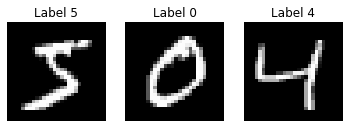

In [9]:
import numpy as np
import matplotlib.pyplot as plt

digit = x.iloc[0]
digit_pixels = np.array(digit).reshape(28, 28)
plt.subplot(131)
plt.title("Label " + str(y.iloc[0]))
plt.imshow(digit_pixels, cmap=plt.cm.gray)
plt.axis('off')

digit = x.iloc[1]
digit_pixels = np.array(digit).reshape(28, 28)
plt.subplot(132)
plt.title("Label " + str(y.iloc[1]))
plt.imshow(digit_pixels, cmap=plt.cm.gray)
plt.axis('off')

digit = x.iloc[2]
digit_pixels = np.array(digit).reshape(28, 28)
plt.subplot(133)
plt.title("Label " + str(y.iloc[2]))
plt.imshow(digit_pixels, cmap=plt.cm.gray)
plt.axis('off')

Before we start with the model training we divide it into train and test data.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print("Train data points:", len(X_train))
print("Test data points:", len(X_test))

Train data points: 56000
Test data points: 14000


### 2. Model Training

Your exercise is now to train a logistic regression model using an one-vs-rest approach (see lecture slides).

For this, implement the following steps:
1. Apply min-max normalization to `X_train` and `X_test` to normalize the data.
2. Train an binary logistic regression to predict: "Is there the digit `9` on the image ?". Hint: For this you need to change the labels in `y_train`. Calculate the accuaracy of this classifer on the test data.
3. Train a binary logistic regression on each digit from `0` to `9`. Save each model in a list.
4. For every test data point, predict which each model on it to find out which models returns the highest probability for the point.
5. Use the results from step 4 to calculate the accuracy of the overall approach on the test data.